<a href="https://colab.research.google.com/github/sureshk6026/task-5/blob/main/Copy_of_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_curve, roc_auc_score 

In [ ]:
user=pd.read_csv("/content/takehome_users (1).csv",encoding='ISO-8859-1')
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [ ]:
user.rename(columns={'object_id':'user_id'},inplace=True)

In [ ]:
engagements=pd.read_csv('/content/takehome_user_engagement (1).csv')

In [ ]:
engagements.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1.0,1.0
1,2013-11-15 03:45:04,2.0,1.0
2,2013-11-29 03:45:04,2.0,1.0
3,2013-12-09 03:45:04,2.0,1.0
4,2013-12-25 03:45:04,2.0,1.0


In [ ]:
engagements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150470 entries, 0 to 150469
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time_stamp  150470 non-null  object 
 1   user_id     150469 non-null  float64
 2   visited     150469 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
engagements.time_stamp=pd.to_datetime(engagements.time_stamp)
engagements_2=engagements.set_index('time_stamp').groupby("user_id")['visited'].resample('D').count()
engagements_2=pd.DataFrame(engagements_2)
engagements_2.head()

visited
user_id time_stamp         
1.0     2014-04-22        1
2.0     2013-11-15        1
        2013-11-16        0
        2013-11-17        0
        2013-11-18        0

In [ ]:
engagements_2=engagements_2.rolling(window=7,min_periods=1).sum()

In [ ]:
engagements_2.reset_index(inplace=True)
engagements_2.head()

,user_id,time_stamp,visited
0,1.0,2014-04-22,1.0
1,2.0,2013-11-15,2.0
2,2.0,2013-11-16,2.0
3,2.0,2013-11-17,2.0
4,2.0,2013-11-18,2.0


In [ ]:
engagements_3=engagements_2.groupby('user_id')[["visited"]].max()
engagements_3.head()

,visited
user_id,
1.0,1.0
2.0,3.0
3.0,2.0
4.0,3.0
5.0,4.0


In [ ]:
engagements_3.loc[engagements_3['visited']>=3,'adopted_user']=1
engagements_3.loc[engagements_3['visited']<3,'adopted_user']=0

In [ ]:
engagements_3.reset_index(inplace=True)
engagements_3.head()

,user_id,visited,adopted_user
0,1.0,1.0,0.0
1,2.0,3.0,1.0
2,3.0,2.0,0.0
3,4.0,3.0,1.0
4,5.0,4.0,1.0


In [ ]:
df=engagements_3.merge(user, how='inner',on='user_id',sort=True)
df.head()

,user_id,visited,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1.0,1.0,0.0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2.0,3.0,1.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3.0,2.0,0.0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4.0,3.0,1.0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5.0,4.0,1.0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
df.isnull().sum()

user_id                          0
visited                          0
adopted_user                     0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            2898
dtype: int64

In [ ]:
df['invited_by_user_id'].fillna(0,inplace=True)
df['invited_by_user_id']=df['invited_by_user_id'].astype(int)

In [ ]:
df.creation_time= pd.to_datetime(df.creation_time)
df.last_session_creation_time=pd.to_datetime(df.last_session_creation_time)
df['active_days']=df['last_session_creation_time'] - df["creation_time"]
df['active_days']=df["active_days"].dt.days

In [ ]:
df.head()

,user_id,visited,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days
0,1.0,1.0,0.0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803,-16183
1,2.0,3.0,1.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316,-16025
2,3.0,2.0,0.0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525,-15784
3,4.0,3.0,1.0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151,-15847
4,5.0,4.0,1.0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240,-15723


In [ ]:
df_ml=df[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','invited_by_user_id','active_days','adopted_user']]

In [ ]:
df_ml.adopted_user.value_counts()

1.0    5759
0.0     590
Name: adopted_user, dtype: int64

In [ ]:
df_ml_class1=df_ml[df_ml['adopted_user']==1]
df_ml_class0=df_ml[df_ml['adopted_user']==0]

In [ ]:
df_ml_class1_sampled=df_ml_class1.sample(n=len(df_ml_class0),random_state=101)


In [ ]:
df_ml_balanced = df_ml_class1_sampled.append(df_ml_class0)

In [ ]:
df_ml_balanced.adopted_user.value_counts()

1.0    590
0.0    590
Name: adopted_user, dtype: int64

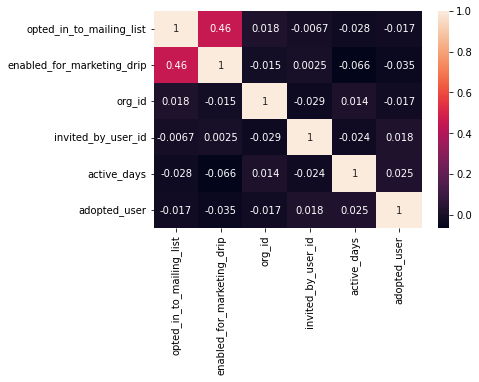

In [ ]:
corr =df_ml_balanced.corr()
sns.heatmap(corr,annot=True,xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
corr.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,adopted_user
opted_in_to_mailing_list,1.000000,0.456187,0.018393,-0.006750,-0.027937,-0.017385
enabled_for_marketing_drip,0.456187,1.000000,-0.014561,0.002538,-0.065975,-0.034962
org_id,0.018393,-0.014561,1.000000,-0.028786,0.014109,-0.016855
invited_by_user_id,-0.006750,0.002538,-0.028786,1.000000,-0.023575,0.017713
active_days,-0.027937,-0.065975,0.014109,-0.023575,1.000000,0.025211


In [ ]:
creation_source_dum=pd.get_dummies(df_ml_balanced['creation_source'],drop_first=True)

In [ ]:
df_ml_balanced.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,adopted_user
2534,SIGNUP_GOOGLE_AUTH,0,0,303,0,-16220,1.0
4387,PERSONAL_PROJECTS,0,0,0,0,-15645,1.0
6021,ORG_INVITE,0,0,15,2147,-16099,1.0
1903,SIGNUP,0,0,415,0,-15720,1.0
3423,SIGNUP,0,0,78,0,-15732,1.0


In [ ]:
df_ml_balanced.drop(['creation_source'],axis=1,inplace=True)

In [ ]:
X=pd.concat([df_ml_balanced,creation_source_dum],axis=1)
X.drop(['adopted_user'],axis=1,inplace=True)
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
2534,0,0,303,0,-16220,0,0,0,1
4387,0,0,0,0,-15645,0,1,0,0
6021,0,0,15,2147,-16099,1,0,0,0
1903,0,0,415,0,-15720,0,0,1,0
3423,0,0,78,0,-15732,0,0,1,0


In [ ]:
y= df_ml_balanced['adopted_user']
y.head()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
clf_RF=RandomForestClassifier(random_state=101,n_jobs=-1)
clf_RF.fit(X_train,y_train)
y_predicted_RF=clf_RF.predict(X_test)

clf_LR=LogisticRegression(random_state=101,n_jobs=-1)
clf_LR.fit(X_train,y_train)
y_predicted_LF=clf_LR.predict(X_test)

clf_NB=GaussianNB()
clf_NB.fit(X_train,y_train)
y_predicted_NB=clf_NB.predict(X_test)

In [ ]:
print("Random Forest")
print(classification_report(y_test,y_predicted_RF))

Random Forest
              precision    recall  f1-score   support

         0.0       0.50      0.54      0.52       168
         1.0       0.55      0.52      0.54       186

    accuracy                           0.53       354
   macro avg       0.53      0.53      0.53       354
weighted avg       0.53      0.53      0.53       354



In [ ]:
print("Logistic Regression")
print(classification_report(y_test,y_predicted_LF))

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.46      0.66      0.54       168
         1.0       0.50      0.30      0.37       186

    accuracy                           0.47       354
   macro avg       0.48      0.48      0.46       354
weighted avg       0.48      0.47      0.45       354



In [ ]:
print("GaussianNB")
print(classification_report(y_test,y_predicted_NB))

GaussianNB
              precision    recall  f1-score   support

         0.0       0.44      0.52      0.48       168
         1.0       0.47      0.39      0.43       186

    accuracy                           0.45       354
   macro avg       0.45      0.46      0.45       354
weighted avg       0.46      0.45      0.45       354

